## Домашнее задание
Взять с прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
# исходный ряд
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
original_series = sales_of_company_x.iloc[:,1]

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
        plt.show()
    return

In [5]:
#Напишем ф-ю для проверки стационарности ряда и его последовательного преобразования
def check_ts(df):
    series = df.iloc[:,1]
    tsplot(series)
    dftest = adfuller(series, autolag='AIC')
    if dftest[1] < 0.05:
        print('Как мы видим, тест Дики-Фуллера отвергает гипотезу о нестационарности ряда, ряд стационарен')
    else:
        print('Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса')
        series = boxcox(series, 0)
        tsplot(series)
        dftest = adfuller(series, autolag='AIC')
        if dftest[1] < 0.05:
            print('При помощи Бокса-Кокса удалось добиться стационарности ряда, тест Дики-Фуллера отвергает гипотезу о нестационарности ряда')
        else:
            print('Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.')
            series = series[1:] - series[:-1]
            tsplot(series)
            dftest = adfuller(series, autolag='AIC')
            if dftest[1] < 0.05:
                print('При помощи дифференцирования удалось добиться стационарности ряда, тест Дики-Фуллера отвергает гипотезу о нестационарности ряда')
            else:
                print('Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее')
                lag = dftest[2]
                series = series[lag:] - series[:-lag]
                tsplot(series)
                dftest = adfuller(series, autolag='AIC')
                if dftest[1] < 0.05:
                    print('Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!')
                else:
                    print('После всех доступных преобразований ряд остался нестационарным:(')
            return series

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\Vera_Romantsova\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


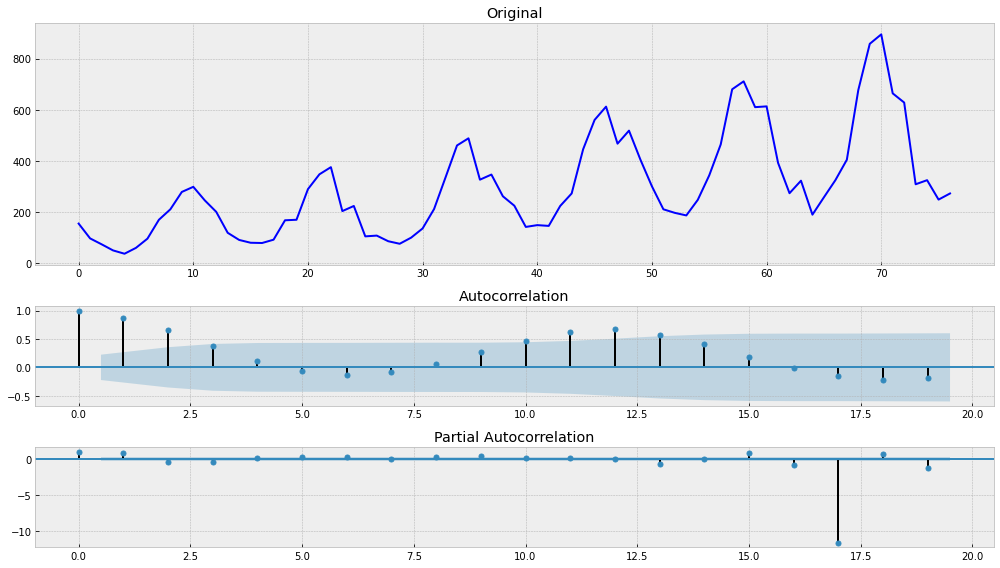

Как мы видим, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса
Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\Vera_Romantsova\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


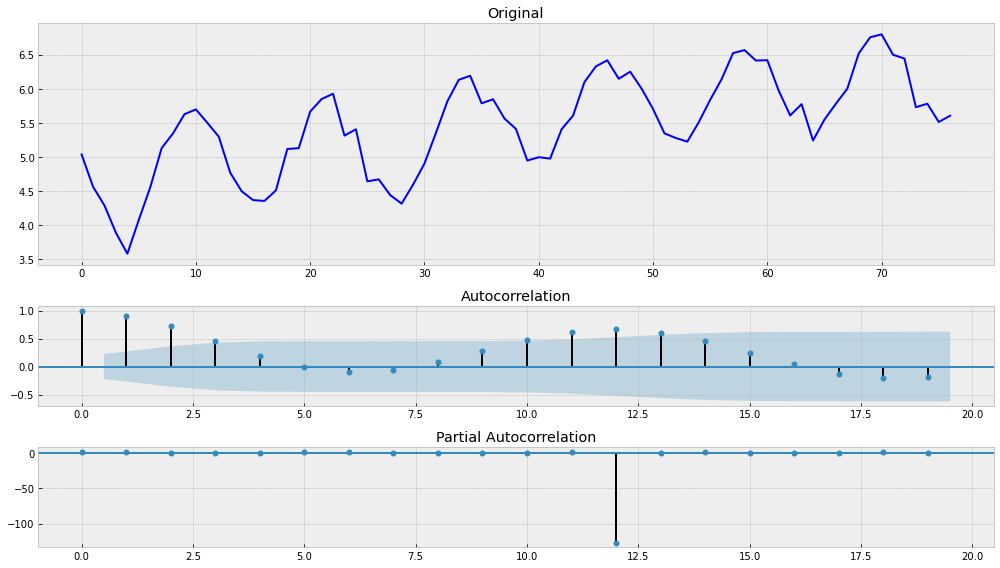

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


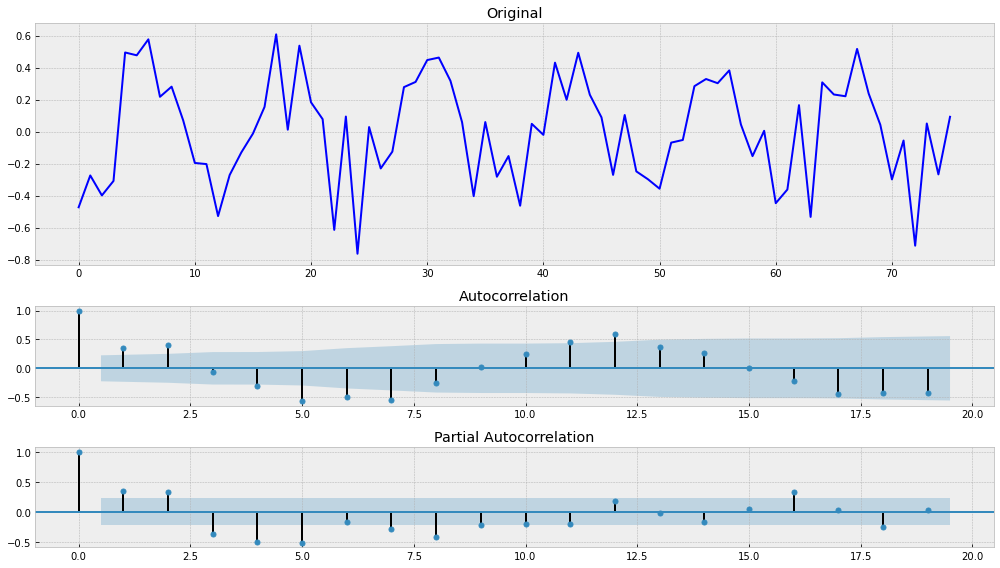

При помощи дифференцирования удалось добиться стационарности ряда, тест Дики-Фуллера отвергает гипотезу о нестационарности ряда


In [6]:
#Проверим ряд, в случае чего получим стационарный ряд
ts_series = check_ts(sales_of_company_x)

In [7]:
# Применим MA для стационарного (преобразованного ряда ts_series)
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

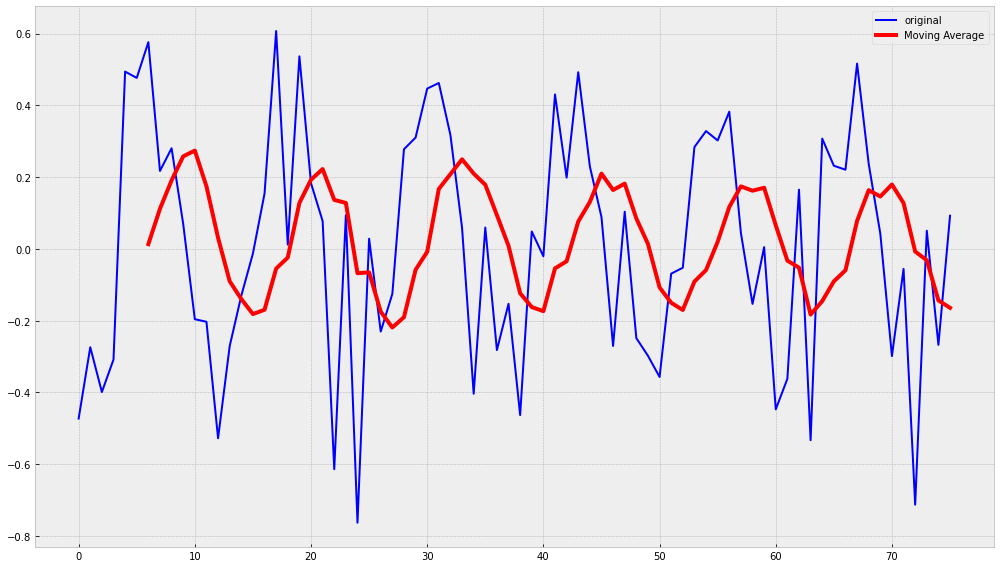

In [8]:
ser = moving_average(ts_series, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts_series, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.tight_layout()
    plt.legend()

In [9]:
# исходный ряд характеризуется наличием восходящего тренда и явно выраженной сезонностью
#для стационарного ряда применим EMA (DEMA и TEMA не имеет смысла, т.к. сезонной и трендовой компоненты в стационарном ряде нет)
def exponential_moving_average(ts_series, alpha):
    result = [ts_series[0]]
    for n in range(1, len(ts_series)):
        result.append(alpha * ts_series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

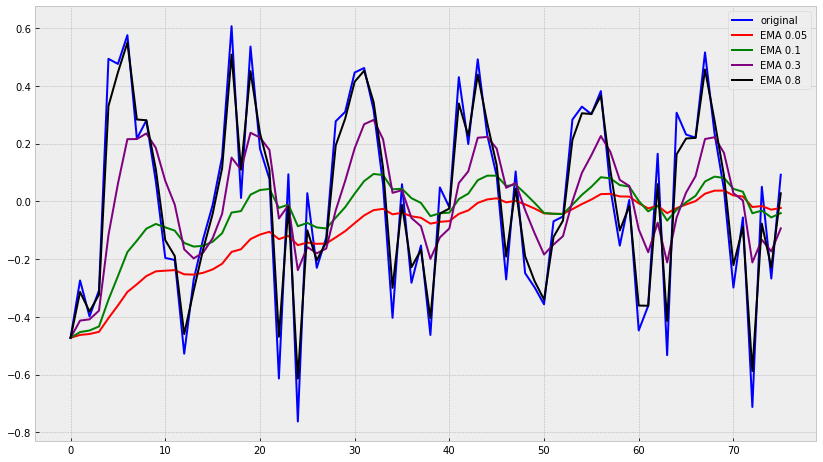

In [10]:
# посмотрим, как при раздличных значениях alpha экспоненциальное сглаживание описывает наш стационарный ряд
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts_series, color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(ts_series, alphas[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.legend()

In [11]:
# посчитаем значения для разбивки
length = len(ts_series)
train_count = int(round(length*0.6,0))
test_count = int(round(length*0.2,0))
val_count = length - train_count - test_count
print(f'Число значений ряда для обучающей выборки {train_count}')
print(f'Число значений ряда для тестовой выборки {test_count}')
print(f'Число значений ряда для валидационной выборки {val_count}')

Число значений ряда для обучающей выборки 46
Число значений ряда для тестовой выборки 15
Число значений ряда для валидационной выборки 15


In [12]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [13]:
#Зададим выборки для обучения, теста, валидации
train, test, val = ts_series[:train_count], ts_series[train_count:(train_count+test_count)], ts_series[(train_count+test_count):]

In [14]:
#Подберем наилучшее значение параметра alpha
def exponential_moving_average(ts_series, alpha, n_pred=None):
    result = [ts_series[0]]
    for n in range(1, len(ts_series)):
        result.append(alpha * ts_series[n-1] + (1 - alpha) * result[n-1])
    if not n_pred:
        return pd.Series(result)
    
    predictions = [alpha * ts_series[len(ts_series) - 1] + (1 - alpha) * result[-1]]

    for _ in range(n_pred):
        res = alpha * predictions[-1] + (1 - alpha) * result[-1]
        result.append(res)
        predictions.append(res)
    
    return ts_series.append(pd.Series(predictions), ignore_index=True), pd.Series(result)

In [15]:
def mse(X):
    alpha = X
    result = exponential_moving_average(pd.Series(train), alpha, len(test))
    predictions = result[1][-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [16]:
opt = minimize(mse, x0=[0], method="L-BFGS-B", bounds = ((0, 1),))

In [18]:
#наилучшее значение alpha:
alpha_opt = opt.x
print(opt)

      fun: 0.0811571010214731
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.06686211])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([1.])


In [19]:
def plot_ema(ts_series, alpha, ser_to_plot=ts_series, n_preds=0):
    ema = exponential_moving_average(pd.Series(ts_series), alpha, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ts_series, color='blue',label='original')
        plt.plot(ema[1], color='red', linewidth='2', label='EMA')
        plt.title(f'alpha={alpha}')
        plt.tight_layout()
        plt.legend()

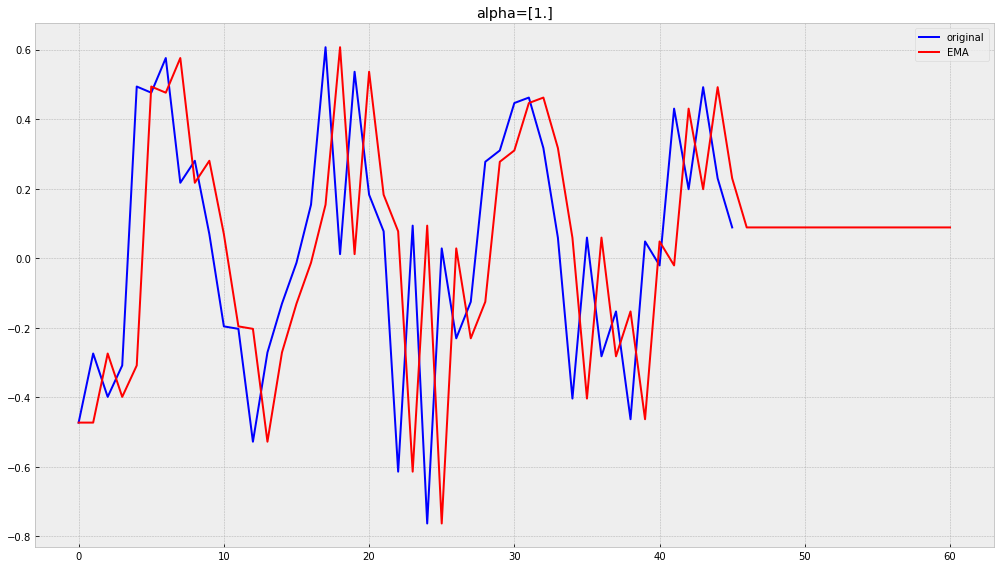

In [20]:
plot_ema(ts_series=train, alpha=alpha_opt, ser_to_plot=val, n_preds=len(test))

In [21]:
#для EMA характерно запаздывание, поэтому пробуем все-таки применить DEMA

In [22]:
def double_ema_with_preds(ts_series, alpha, beta, n_preds=0):
    result = [ts_series[0]]
    level, trend = ts_series[0], ts_series[1] - ts_series[0]
    for n in range(1, len(ts_series)+n_preds):
        if n >= len(ts_series):
            m = n - len(ts_series) + 1
            last_level, level = level, alpha*value + (1-alpha)*(level+trend)
            trend = beta*(level-last_level) + (1-beta)*trend
            result.append(level+m*trend)
        else:
            value = ts_series[n]
            last_level, level = level, alpha*value + (1-alpha)*(level+trend)
            trend = beta*(level-last_level) + (1-beta)*trend
            result.append(level+trend)

    return pd.Series(result)

In [23]:
def plot_dema(ts_series,alpha, beta, ser_to_plot=ts_series, n_preds=0):
    dema = double_ema_with_preds(ts_series, alpha, beta,n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ts_series, color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

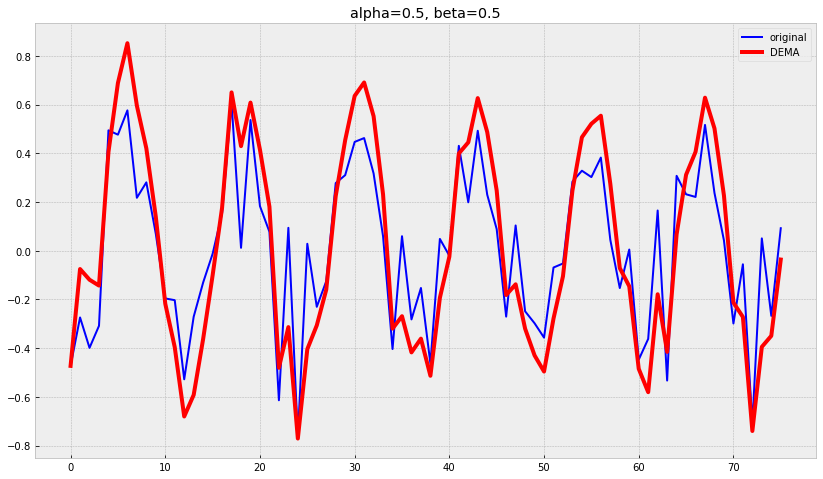

In [24]:
plot_dema(ts_series, 0.5, 0.5)

In [25]:
def mse_dema(X):
    alpha, beta = X
    result = double_ema_with_preds(pd.Series(train), alpha, beta, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [26]:
opt_2 = minimize(mse_dema, x0=[0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1)))

In [27]:
alpha_opt, beta_opt = opt_2.x
print(alpha_opt, beta_opt)

0.34764441481772423 0.6687109242969277


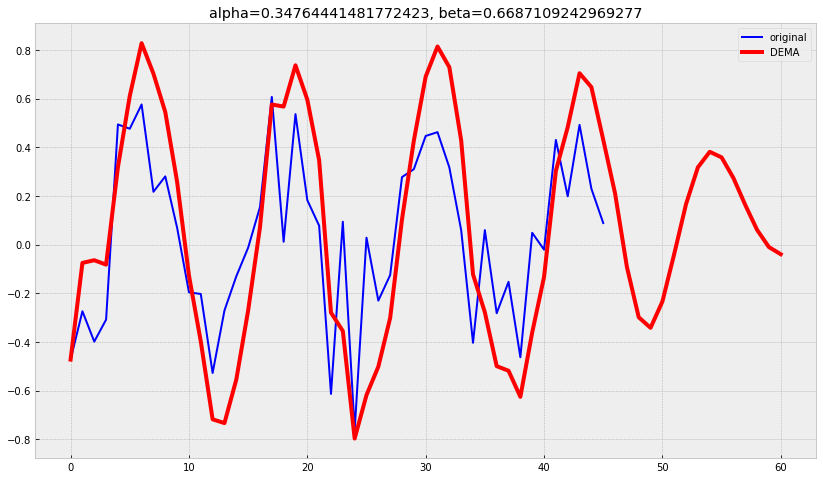

In [28]:
plot_dema(ts_series=train, alpha=alpha_opt, beta=beta_opt, ser_to_plot=ts_series[:(train_count+test_count)], n_preds=len(test))

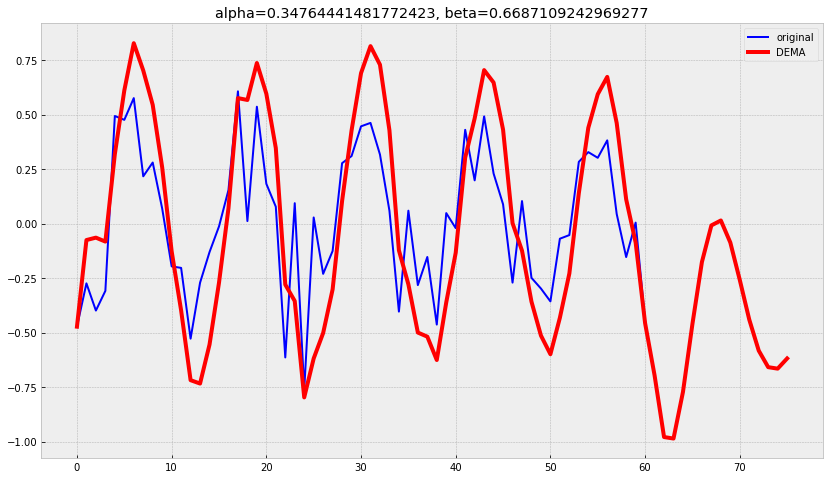

In [29]:
plot_dema(ts_series=ts_series[:(train_count+test_count)], alpha=alpha_opt, beta=beta_opt, ser_to_plot=ts_series, n_preds=len(val))

In [30]:
# видим, что ряд не запаздывает, но не описывается хорошо, хотя общую тенденцию мы поймали, пробуем применить TEMA для исходного ряда

In [31]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

def plot_tema(alpha, beta, gamma, ser=original_series, ser_to_plot=original_series, n_preds=len(test)):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

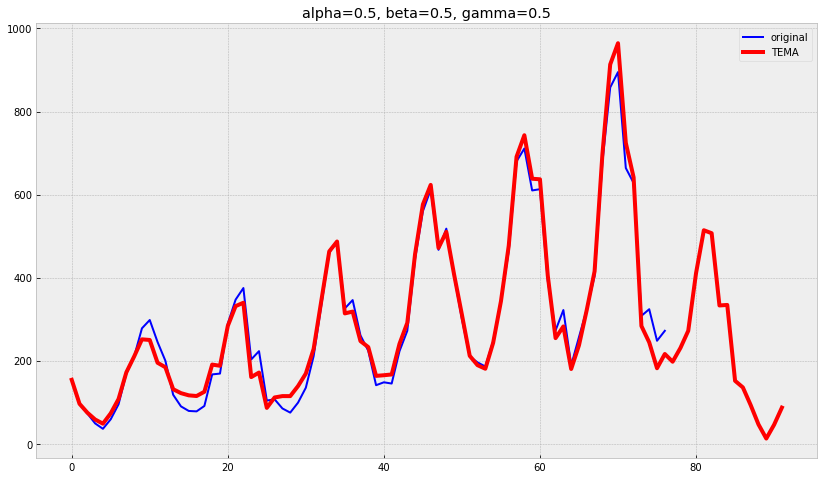

In [32]:
plot_tema(0.5, 0.5, 0.5)

In [33]:
#Зададим выборки для обучения, теста, валидации для исходного ряда
train, test, val = original_series[:train_count], original_series[train_count:(train_count+test_count)], original_series[(train_count+test_count):]

In [34]:
#пробуем подобрать оптимальные параметры
def mse_3(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [35]:
opt = minimize(mse_3, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [36]:
#Выведем наилучшие параметры для TEMA
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 6353.16524204068
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -0.08003553,  -0.47293724, -28.57641434])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 112
      nit: 24
     njev: 28
   status: 0
  success: True
        x: array([0.62284896, 0.05367796, 1.        ])


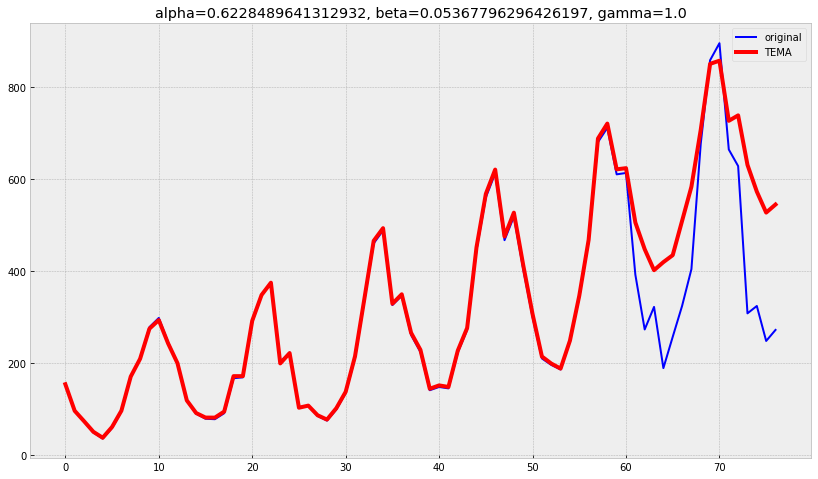

In [37]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser = original_series[:(train_count+test_count)], ser_to_plot = original_series, n_preds=len(val))

In [38]:
#Видим, что на тестовой выборке (начало ряда) - описываем ряд очень хорошо, но потом - начинаются отклонения в пиках сезонности